<img src="jalalogo.png">

# Semana 1: Explorando los datos

## Tipos de datos:



Numérico (Cuantitativo)
- Continuo (Rango)
  - Velocidad del un tren
  - Estatura de una persona
  - Tiempo en cargar una página

- Discreto (Conteo)
  - Número de visitantes en un centro comercial
  - Número de personas trabajando en una empresa

Categórico (Cualitativo)
- Nominal (No ordenado)
  - Casado/soltero
  - País de residencia

- Ordinal (Ordenado)
  -Primero, segundo, tercero.  




## Medidas de centro: 

### Media: 
 
Tambien conocido como promedio. La media es la suma de todos los puntos de datos dividida por el número total de puntos de datos.

### Mediana:
La mediana es el valor medio del conjunto de datos donde el 50% de los datos es mayor que la mediana y el 50% de los datos es menor que la mediana. Es un punto que está en mitad de la
muestra, y no tiene por qué coincidir con la media.

### Moda: 
El dato que más se repite.

### Ejemplo General: 

Considere la base de datos tomado de Kaggle:(Students Performance in Exams) sobre la cual se realizarán diferentes cálculos a traves del resto del Notebook.

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


In [2]:
#Ejemplo 1: 
#importar librerias
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from scipy.stats import skewnorm # Necesario para realizar el gráfico de los sesgos
from scipy import stats

#Cargamos la base de datos previamente descargada en la carpeta de trabajo.
data = pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Clasifiquemos cada una de las variables de la base de datos:

**Cualitativa-Nominal:** `Gender` (Género), `Race/ethnicity` ( Raza), `lunch` (tipo almuerzo),    `test preparation course` ( Curso de preparación)

**Cualitativa-Ordinal:** `parental level of education`

**Cuantitativa- Discreta:** `math score`, 	`reading score`, 	`writing score`,  



In [2]:
#Notemos los diferentes valores de la variable 'parental level of education'
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [3]:
#Calcular el promedio de la variable math score and reading score. Comparar estos dos promedios.

promedio_matematicas = np.mean(data['math score'])
promedio_lectura = np.mean(data['reading score'])

print(f'El promedio de matemáticas es {promedio_matematicas} y el de lectura es {promedio_lectura}')

El promedio de matemáticas es 66.089 y el de lectura es 69.169


In [4]:
#Notamos como el rendimiento de los estudiantes es mejor en lectura que en matemáticas

In [5]:
#Calculemos la mediana de math_score y comparemos con la media o promedio.
mediana_matematicas = np.median(data['math score'])

print(f'El promedio de matemáticas es {promedio_matematicas} y su mediana es {mediana_matematicas}')


El promedio de matemáticas es 66.089 y su mediana es 66.0


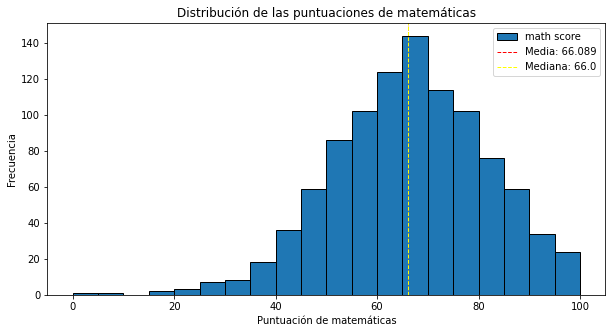

In [6]:
#Notamos como el valor central(mediana) y su promedio no difieren significativamente. 
# Podemos realizar un diagrama de barras para corroborar que no hay un cesgo en los datos.

 

# Creamos el histograma
plt.figure(figsize=(10, 5))  


data['math score'].plot.hist(bins=20, edgecolor='black')

#Visualizamos la media:
plt.axvline(promedio_matematicas, color='red', linestyle='dashed', linewidth=1,label=f'Media: {promedio_matematicas}')
plt.axvline(promedio_matematicas, color='yellow', linestyle='dashed', linewidth=1,label=f'Mediana: {mediana_matematicas}')


plt.legend()
plt.title('Distribución de las puntuaciones de matemáticas')
plt.xlabel('Puntuación de matemáticas')
plt.ylabel('Frecuencia')
plt.show()



'''
Los datos son simétricos alrededor de la media o mediana, no se observa un sesgo en la variable math score.

Vale la pena anotar que la distribución de la puntuaciones matemáticas siguen 
una distribución normal(forma de campana) que se estudiará en la semana 6 
'''

También podemos recurrir al método   `.describe()` 


Este método proporciona un resumen estadístico de las columnas de un DataFrame,
incluyendo medidas como el conteo de filas, la media, la desviación estándar, 
los valores mínimo y máximo, y los percentiles.

In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
# A continuación calculemos la moda de la variable 'parental level of education' 
'''En Python, puedes usar `statistics.mode()` para calcular 
la moda de una lista o de una secuencia de datos numéricos o no numéricos.'''

statistics.mode(data['parental level of education'])

'some college'

In [9]:
# también se puede recurrir al método .value_counts():
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [10]:
#Notamos como el valor que más se repite es 'some college con 226 registros'

### Ejemplo:  (La media es suceptible a los valores atípicos)


En una compañía que cuenta con tres empleados, se tiene la siguiente estructura de salarios mensuales:

- Dos programadores ganan cada uno \$3,000.
- Un jefe (Chief) gana $20,000.

Todos los salarios están expresados en dólares. Determinar el promedio de los salarios y la mediana. Explicar como el salario se ve afectado por el valor atipico del salario del chef. 

In [11]:
salarios = [3000,3000,20000]
promedio_salarios = np.mean(salarios)
 

mediana_salarios = np.median(salarios)

print(f' El promedio de los salarios es {promedio_salarios} y la mediana es {mediana_salarios}')

 El promedio de los salarios es 8666.666666666666 y la mediana es 3000.0


El salario del jefe es significativamente más alto que el de los otros empleados (casi 7 veces el de los programadores), lo que lo convierte en un valor atípico. Este valor atípico tiene un impacto considerable en el promedio de los salarios, elevándolo a \$8,666.67, que es mucho más alto que la mayoría de los salarios restantes (3,000). 

Sin embargo, la mediana, siendo \$3,000, refleja mejor el salario típico dentro de la compañía, ya que no se ve afectada por valores extremadamente altos o bajos.

Esto muestra cómo los valores atípicos pueden distorsionar el promedio, haciéndolo menos representativo de lo que la mayoría de los empleados realmente percibe, mientras que la mediana puede ofrecer una mejor representación de la tendencia central en presencia de valores atípicos.

## Comparación entre la media y la mediana.

La forma de una distribución determina si la media es mayor o menor que la mediana. En general, si la forma de la distribución es:

- Perfectamente simétrica, la media es igual a la mediana.
- Sesgada a la izquierda, la media es menor que la mediana.
- Sesgada a la derecha, la media es mayor que la mediana.

La siguiente gráfica ilustra esta situación:

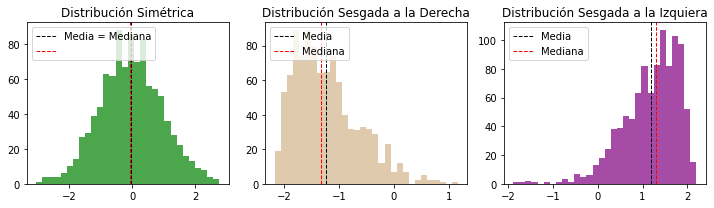

In [8]:
#Código para generar la gráfica.
# Generar datos para las distribuciones
np.random.seed(0)
data_symmetric = np.random.normal(loc=0, scale=1, size=1000)  # Distribución simétrica
data_left_skewed = skewnorm.rvs(a=10, loc=-2, scale=1, size=1000)  # Distribución sesgada a la izquierda
data_right_skewed = skewnorm.rvs(a=-10, loc=2, scale=1, size=1000)  # Distribución sesgada a la derecha

# Crear figuras para las distribuciones
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Títulos para cada subgráfico
titles = ['Distribución Simétrica', 'Distribución Sesgada a la Derecha', 'Distribución Sesgada a la Izquiera']
sesgo = [data_symmetric, data_left_skewed, data_right_skewed]
colors = ['green', 'tan', 'purple']

for ax, datum, title, color in zip(axs, sesgo, titles, colors):
    ax.hist(datum, bins=30, color=color, alpha=0.7)
    ax.axvline(datum.mean(), color='k', linestyle='dashed', linewidth=1)
    ax.axvline(np.median(datum), color='r', linestyle='dashed', linewidth=1)
    ax.set_title(title)

# Etiquetas para líneas de media y mediana
axs[0].legend(['Media = Mediana', ''], loc='upper left')
axs[1].legend(['Media', 'Mediana'], loc='upper left')
axs[2].legend(['Media', 'Mediana'], loc='upper left')

plt.tight_layout()
plt.show()


# Medidas de Dispersión

### Rango:
El Rango es la diferencia entre el valor máximo y el valor mínimo, cuanto mayor es el rango, más dispersos están los datos.

### Desviación estándar: 

La desviación estándar es una medida de dispersión que indica cuánto se alejan los datos individuales de la media. 


In [13]:
#Calculemos el rango de la variable reading score
Rango = data['reading score'].max()-data['reading score'].min()
print(Rango)

83


In [14]:
# El rango es 83, lo cual coincide con lo que muestra la tabla obtenida anteiormente con el método .describe()

### Cuartiles y otros Percentiles

La desviación estándar es la medida de dispersión más comúnmente empleada; sin embargo, existen otras maneras de caracterizar la variabilidad o dispersión en un conjunto de datos. Una de estas metodologías implica identificar los valores que dividen un conjunto de observaciones en porciones iguales, utilizando medidas como cuartiles, deciles y percentiles.
 
Los cuantiles son una herramienta para resumir datos numéricos porque permiten analizar el centro y la dispersión de un conjunto de datos. También proporcionan una perspectiva clara sobre la posición relativa de un punto de datos dentro del conjunto total. Por ejemplo, podrías querer ofrecer un descuento al 10% de los usuarios más activos de un sitio web.



In [15]:
# Calcula los cuartiles de math score
print(np.quantile(data['math score'],[0, 0.25, 0.5, 0.75, 1]))

[  0.  57.  66.  77. 100.]


### Interpretación: 
Los cuartiles que se obtienen [0, 57, 66, 77, 100] representan puntos de división que organizan los resultados de la prueba de matemáticas en intervalos que contienen aproximadamente la misma cantidad de datos. 

1. **Mínimo (0% cuartil):** El valor mínimo en los resultados de la prueba es 0. Esto indica que el puntaje más bajo obtenido fue 0.

2. **Primer cuartil (Q1, 25% cuartil):** El 25% de los estudiantes obtuvo un puntaje de 57 o menos en la prueba. Esto significa que el primer cuartil está en 57, lo cual es el límite donde el 25% de los puntajes están por debajo.

3. **Mediana (Q2, 50% cuartil):** La mediana, o segundo cuartil, es 66. Esto indica que el 50% de los estudiantes obtuvo un puntaje de 66 o menos. La mediana divide el conjunto de datos en dos partes iguales.

4. **Tercer cuartil (Q3, 75% cuartil):** El 75% de los estudiantes obtuvo un puntaje de 77 o menos. El tercer cuartil a 77 muestra que tres cuartos de los puntajes están por debajo de este valor.

5. **Máximo (100% cuartil):** El valor máximo en los resultados de la prueba es 100. Esto indica que el puntaje más alto obtenido fue 100.


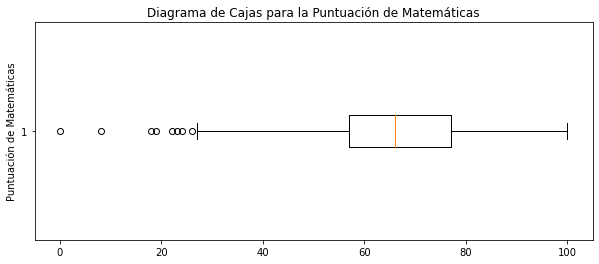

In [16]:
#El diagrama de cajas permite visualizar mejor estos resultados:
# Crear el diagrama de cajas
plt.figure(figsize=(10, 4))  # Ajusta el tamaño del gráfico según necesites
plt.boxplot(data['math score'],vert=False)
plt.title('Diagrama de Cajas para la Puntuación de Matemáticas')
plt.ylabel('Puntuación de Matemáticas')
plt.show()

### Observación: 

Los **valores atípicos** pueden influir significativamente en estadísticas como la media, la varianza y la desviación estándar. 

Por otro lado, el rango intercuartil, conocido como IQR por sus siglas en inglés, ofrece una alternativa para medir la dispersión que es menos susceptible a los efectos de los valores atípicos. Esta medida también se emplea comúnmente para identificar dichos valores. En términos prácticos, un valor se considera atípico si se encuentra por debajo de `Q1 - 1.5 * IQR` o por encima de `Q3 + 1.5 * IQR`, donde Q1 y Q3 representan el primer y tercer cuartil, respectivamente. Este criterio se utiliza para determinar la longitud de los bigotes en un diagrama de caja (‘box plot’) en matplotlib.

<img src="BoxPlot-Interpretacion.png">


##  Otras medidas

### La media ponderada

En diversas situaciones, no todos los valores tienen la misma relevancia, por lo que puede resultar beneficioso asignar pesos a los datos según su importancia para un estudio específico. En este contexto, no se realiza una suma simple de los valores, sino que se calcula una **suma ponderada**. Al dividir esta suma por el total de los pesos asignados, obtenemos la **media ponderada**.

$${\bar  {x}}={\frac  {\sum\limits_{{i=1}}^{n}x_{i}w_{i}}{\sum\limits_{{i=1}}^{n}w_{i}}}={\frac  {x_{1}w_{1}+x_{2}w_{2}+x_{3}w_{3}+...+x_{n}w_{n}}{w_{1}+w_{2}+w_{3}+...+w_{n}}}$$


donde 

 

- $ \bar{x} $: Es la media ponderada de los datos.
- $ x_i $: Representa el valor del i-ésimo dato en el conjunto.
- $ w_i $: Es el peso asignado al i-ésimo dato, reflejando su importancia o relevancia en el cálculo de la media.
- $ n $: Es el número total de datos en el conjunto.
- $ \sum $: Es el operador de suma que se usa para sumar las multiplicaciones de valores por sus respectivos pesos y también para sumar todos los pesos.

### Media geométrica

La media geométrica se utiliza en situaciones donde las variaciones tienen un carácter multiplicativo en lugar de aditivo, como en el caso de tasas de crecimiento, rendimientos financieros o cualquier otro fenómeno en el que los cambios se acumulen de manera proporcional en lugar de sumarse. Por ejemplo, si estamos calculando el rendimiento promedio de una inversión a lo largo de varios periodos, la media geométrica sería más apropiada que la aritmética, ya que refleja cómo los rendimientos se multiplican entre sí en lugar de simplemente sumarse.

$${\displaystyle {\bar {x}}={\sqrt[{n}]{\prod _{i=1}^{n}{x_{i}}}}={\sqrt[{n}]{x_{1}\cdot x_{2}\cdots x_{n}}}}$$




### La media recortada (Trimmed Mean) 

Para calcular una media recortada, se eliminan algunos de los valores más altos y más bajos, y se calcula la media con los puntajes restantes. Una media recortada del 10% se obtiene eliminando el 5% de los valores más bajos y el 5% de los valores más altos del conjunto de datos. Una media recortada del 50% se calcula eliminando el 25% superior e inferior de los valores y calculando la media de los puntajes que quedan. 



### Desviación media

La desviación promedio absoluta es la media de los valores absolutos de las distancias entre cada valor en el conjunto de datos y la media.

$$ D_m = \frac{1}{n} \sum_{i=1}^n
 \left| x_i - \overline{x} \right|$$

 ### Desviación mediana

La desviación mediana absoluta $  D_{me}  $ es la mediana de los valores absolutos de las distancias entre cada valor en el conjunto de datos y la media.

 $$ D_{me} = MD(
 {\left| x_i - \overline{x} \right|}_{i=1,...,n})$$
 
 
Esta medida ayuda a entender cuán dispersos están los datos alrededor de la media. En concreto, esta medida calcula la mediana de las desviaciones absolutas de cada valor en un conjunto de datos respecto a la media del conjunto.

 
Nota: $MD(\cdot) $ Indica la mediana de los valores dentro de $(\cdot).$


La desviación mediana absoluta es especialmente útil porque es menos sensible a valores extremos o atípicos en comparación con otras medidas de dispersión, como la desviación estándar. Al calcular la mediana de las desviaciones, se minimiza el impacto de los valores extremos que podrían distorsionar la percepción de la dispersión en un conjunto de datos. Esto hace que la $D_{me}$ sea una herramienta robusta y fiable para describir la variabilidad en diversos contextos estadísticos. 

### Coeficiente de variación de pearson

Medida de dispersión adimensional, que se expresa tanto de forma decimal como en tanto por ciento, y nos expresaría la desviación típica como porcentaje con respecto a la media.

 $$ CV = \dfrac{\sigma}{\bar x}$$

## Ejemplos Resueltos:

### Ejemplo 1: 

En un juego de baloncesto entre un grupo de 10 amigos, la escena se complica cuando Juan, un aficionado a la estadística, plantea su descontento respecto a la conformación de los equipos. Con un ojo agudo para los números, argumenta que el promedio de estatura en uno de los equipos supera al del otro. Enfrentados a este dilema, el reto consiste en calcular de manera meticulosa el promedio de estatura tanto del grupo completo como de cada uno de los equipos por separado. A partir de los datos proporcionados, calcular el promedio de estatura de todos los integrantes y de cada uno de los equipos con el fin de confirmar o refutar la hipótesis de Juan.

Equipo 1: 170, 165, 178, 160, 175

Equipo 2: 175, 179, 168, 178, 163


In [17]:
equipo1= [170, 165, 178, 160, 175]
equipo2= [175, 179, 168, 178, 163]
total= []

In [18]:
promedio1= np.mean(equipo1)
promedio2= np.mean(equipo2)
print(f'El promedio del equipo 1 es {promedio1} y el promedio del equipo 2 es {promedio2}')

El promedio del equipo 1 es 169.6 y el promedio del equipo 2 es 172.6


In [19]:
print(np.std(equipo1))
print(np.std(equipo2))

6.529931086925803
6.151422599691879


### Ejemplo 2: 
Usted ha sido designado para desarrollar una aplicación móvil que rastree el tiempo dedicado al ejercicio por parte de un usuario. Los datos registrados de un usuario, que reflejan la cantidad de minutos que ha empleado la aplicación cada día durante un período de 10 días, se presentan a continuación:

91, 76, 80, 113, 110, 80, 76, 85, 89, 93


Calcular la mediana de los datos.


In [20]:
minutos = [91, 76, 80, 113, 110, 80, 76, 85, 89, 93]
np.median(minutos)

87.0

### Ejemplo 3: 

Se le ha asignado la tarea de analizar las ventas diarias de paneles solares de una empresa durante un período. Los datos recopilados se presentan a continuación. Su tarea es calcular la moda, es decir, determinar el valor que más frecuentemente aparece en las ventas diarias.

0, 4, 10, 15, 19,
0, 4, 10, 15, 19,
2, 6, 11, 15, 20,
2, 8, 14, 16, 22.



In [21]:
ventas = [0, 4, 10, 15, 19, 0, 4, 10, 15, 19, 2, 6, 11, 15, 20, 2, 8, 14, 16, 22]

In [22]:
# Con numpy no hay función que calcule la moda. Puedes usar el paquete de statistics.

moda = statistics.mode(ventas)
print(moda)

15


In [23]:
#Con el método .value_counts() podemos determinar la frecuencia de cada
# uno de los valores
df_values = pd.DataFrame(ventas)
df_values.value_counts()

15    3
0     2
2     2
4     2
10    2
19    2
6     1
8     1
11    1
14    1
16    1
20    1
22    1
dtype: int64

### Ejemplo 4: 
 
Para cada una de las siguientes situaciones, ¿utilizarías la mediana o la media para describir el centro de los datos?   ¿Por qué? (Piensa en la forma probable de la distribución).

a. Salario de los empleados de una compañía.  

b. Tiempo empleado en un examen difícil.  

c. Puntuaciones en una prueba estandarizada.

d. Número de solicitudes para restablecer contraseñas de cuentas individuales de correo electrónico.

##### Solución

a. En este caso, es conveniente usar la mediana, dado que algunos salarios altos podrían afectar la media. La curva de la distribución sería con sesgo a la derecha.

b. En este caso, la mediana es más conveniente, dado que algunas personas podría tomar más tiempo lo que haría que la curva sería sesgada a la izquierda. 

c. La media, dado que en este tipo de situaciones los resultados a cada lado  de la media tienden a ser simétricos. La curva de la distribución es simétrica.

d. Mediana. La mayoría del  número de solicitudes tiende a ser bajo, solamente pocas cuentas tendrían  un número alto de solicitudes. La distribución tendría un sesgo a la derecha.

### Ejemplo 5: Considere las siguientes observaciones:

Grupo 1: 8,9,10,11,12

Grupo 2: 8,9,10,11,100

Grupo 3: 8,9,10,11,1000

Halle la media y la mediana de cada uno de estos grupos.

¿Qué conclusiones puede extraer de estos resultados?

#### Solución

In [24]:

# Definir los datos en un DataFrame
data = {
    'Grupo 1': [8, 9, 10, 11, 12],
    'Grupo 2': [8, 9, 10, 11, 100],
    'Grupo 3': [8, 9, 10, 11, 1000]
}

df = pd.DataFrame(data)

# Función para calcular la media y la mediana usando apply
def calcular_estadisticas(grupo):
    media = grupo.mean()
    mediana = grupo.median()
    return pd.Series([media, mediana], index=['Media', 'Mediana'])

# Aplicar la función a cada columna del DataFrame
resultados = df.apply(calcular_estadisticas)
print(resultados)

         Grupo 1  Grupo 2  Grupo 3
Media       10.0     27.6    207.6
Mediana     10.0     10.0     10.0


In [25]:
# Notemos como la mediana no cambia ante la presencia de un valor atípico.

#Pero la media si se ve afectada por este valor atípico. 

### Ejemplo 6:

Observa los gráficos de puntos para tres conjuntos de datos.

a. ¿Para cuál, si es que hay alguno, de los conjuntos de datos esperarías que la media y la mediana sean iguales? Explica por qué.

b. ¿Para cuál, si es que hay alguno, de los conjuntos de datos esperarías que la media y la mediana difieran? ¿Cuál sería mayor, la media o la mediana? ¿Por qué?

---

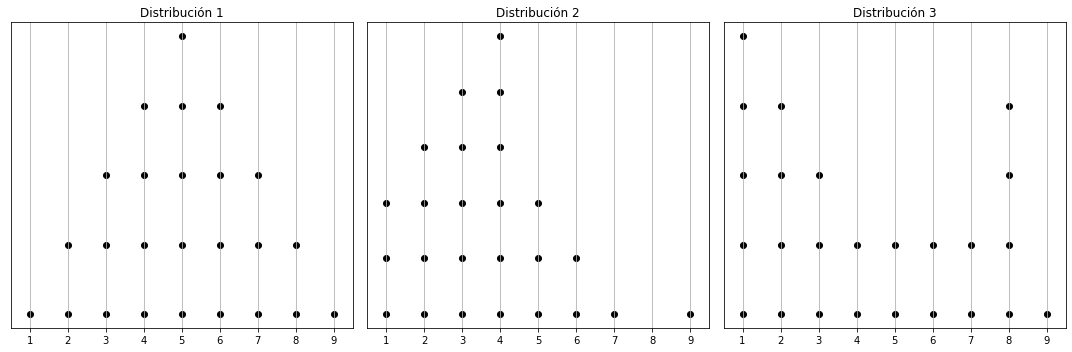

In [26]:
#Código de la gráfica
# Datos simulados
data_numbers = {
    'Distribución 1': np.array([1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,7,7,7,8,8,9]),
    'Distribución 2': np.array([1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,5,5,5,6,6,7,9]),
    'Distribución 3': np.array([1,1,1,1,1,2,2,2,2,3,3,3,4,4,5,5,6,6,7,7,8,8,8,8,9])
}

# Crear la figura y los ejes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Generar cada uno de los gráficos
for ax, (title, values) in zip(axs, data_numbers.items()):
    # Contar la frecuencia de cada valor
    unique, counts = np.unique(values, return_counts=True)
    y = np.concatenate([np.arange(count) for count in counts])
    x = np.concatenate([np.full(count, item) for item, count in zip(unique, counts)])
    
    # Crear el gráfico de dispersión
    ax.scatter(x, y, c='black')
    ax.set_title(title)
    ax.set_xticks(np.arange(1, 10))
    ax.set_yticks([])
    ax.set_xlim(0.5, 9.5)
    ax.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Solución:



a. **Igualdad de media y mediana**:
   - **Distribución 1**: Esperaría que para este conjunto de datos, la media y la mediana sean iguales o muy cercanas. Observando la distribución, parece simétrica con respecto al centro del rango de datos. Los puntos están distribuidos uniformemente alrededor del centro, lo que indica que el efecto de los valores en los extremos se equilibra.

b. **Diferencia entre media y mediana**:
   - **Distribución 2**: En este conjunto, se espera que la media y la mediana difieran. La presencia del valor atípico en 9 (muy alejado del centro de la distribución) probablemente tirará de la media hacia un valor más alto que la mediana. Dado que la mediana es más resistente a los valores atípicos, reflejará un punto central más representativo de la mayoría de los datos, mientras que la media será mayor debido al valor atípico alto.
   - **Distribución 3**: Al igual que en la Distribución 2, se esperaría que la media sea mayor que la mediana. Aunque los datos parecen ligeramente simétricos, la presencia de múltiples valores en los extremos superiores (especialmente el agrupamiento alrededor del 8 y un valor en 9) tiende a aumentar la media más que la mediana. Esto se debe a que la mediana, que caería alrededor de la mitad del rango de datos (probablemente entre 4 y 5), no se ve afectada por estos valores extremos superiores tanto como la media.




### Ejemplo 7:


Trabajas en una empresa ubicada en el centro de Ciudad de México y te han encomendado abordar el problema del elevado consumo de gasolina por parte de los empleados, situación que se agrava debido a la expansión urbana, el tráfico y el uso de vehículos grandes e ineficientes. Para promover el uso del transporte público, has decidido investigar cuántos kilómetros recorren tus empleados en transporte público durante un día típico. Los valores para tus 10 empleados (registrados al kilómetro más cercano) son los siguientes:

0, 0, 4, 0, 0, 10, 0, 6, 0, 0.

a. Calcula e interpreta la media, mediana y moda.

b. Recientemente se ha contratado a un empleado adicional que reside en una ciudad diferente y viaja 145 kilómetros diarios en transporte. Recalcula la media y la mediana, y describe el efecto de este valor atípico.


In [28]:


# Datos originales
kilometros = np.array([0, 0, 4, 0, 0, 10, 0, 6, 0, 0])

# Calcular media, mediana y moda
media_original = np.mean(kilometros)
mediana_original = np.median(kilometros)
moda_original = stats.mode(kilometros)[0][0]  # La función mode devuelve también la frecuencia

# Añadir el valor atípico
datos_con_atipico = np.append(kilometros, 145)

# Recalcular media y mediana con el valor atípico
media_nueva = np.mean(datos_con_atipico)
mediana_nueva = np.median(datos_con_atipico)

print(f"Media original: {media_original}")
print(f"Mediana original: {mediana_original}")
print(f"Moda original: {moda_original}")
print("Después de añadir el valor atípico:")
print(f"Media nueva: {media_nueva}")
print(f"Mediana nueva: {mediana_nueva}")


Media original: 2.0
Mediana original: 0.0
Moda original: 0
Después de añadir el valor atípico:
Media nueva: 15.0
Mediana nueva: 0.0


### Ejemplo 8


La siguiente figura muestra histogramas para tres muestras, cada una con un tamaño de muestra \( n = 100 \).

¿Cuál muestra tiene la (i) mayor y (ii) menor desviación estándar?

---

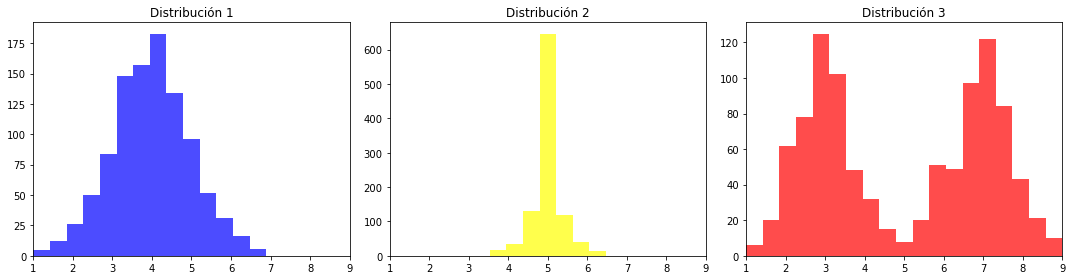

In [29]:
#Codigo de la figura.

# Datos simulados que representan las distribuciones
data1 = np.random.normal(loc=4, scale=1, size=1000)
data2 = np.random.normal(loc=5, scale=0.5, size=500)
data2 = np.append(data2, np.random.normal(loc=5, scale=0.1, size=500))  # Añadir pico
data3 = np.random.normal(loc=3, scale=0.8, size=500)
data3 = np.append(data3, np.random.normal(loc=7, scale=0.8, size=500))  # Distribución bimodal

# Crear la figura y los ejes
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Ajustes para cada histograma
bins = np.linspace(1, 9, 20)  # Bins comunes para todos los histogramas para comparar fácilmente

axs[0].hist(data1, bins=bins, color='blue', alpha=0.7)
axs[0].set_title('Distribución 1')
axs[0].set_xlim(1, 9)

axs[1].hist(data2, bins=bins, color='yellow', alpha=0.7)
axs[1].set_title('Distribución 2')
axs[1].set_xlim(1, 9)

axs[2].hist(data3, bins=bins, color='red', alpha=0.7)
axs[2].set_title('Distribución 3')
axs[2].set_xlim(1, 9)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### Solución: 
    
La mayor desviación estándar se encuentra en la Distribución 3, debido a la separación entre los dos picos que aumenta la variabilidad general.

La menor desviación estándar la tiene la Distribución 2, en parte porque la gran mayoría de los datos están concentrados en torno a una media con una baja variabilidad, aunque el pico estrecho aumenta ligeramente la desviación estándar no lo hace suficientemente como para superar a la Distribución 1.

### Ejemplo 9: 
(Ejercicio tomado de https://onlinestatbook.com/Online_Statistics_Education.pdf, página 156, ejercicio 6)

You recorded the time in seconds it took for 8 participants to solve a puzzle.
These times appear below. However, when the data was entered into the
statistical program, the score that was supposed to be 22.1 was entered as 21.2.

You had calculated the following measures of central tendency: the mean, the
median, and the mean trimmed 25%. Which of these measures of central
tendency will change when you correct the recording error?

| Time (seconds) |
|:--------------:|
|      15.2      |
|      18.8      |
|      19.3      |
|      19.7      |
|      20.2      |
|      21.8      |
|      22.1      |
|      29.4      |



In [6]:
# We create a dictionary
times_participants = {
    'Time': [15.2, 18.8, 19.3, 19.7, 20.2, 21.8, 22.1, 29.4]
}

df = pd.DataFrame(times_participants)

# Mostrar el DataFrame
df


,Time
0,15.2
1,18.8
2,19.3
3,19.7
4,20.2
5,21.8
6,22.1
7,29.4


### Ejemplo 10:  ( Media ponderada)
Eres un profesor que necesita calcular la calificación final de un estudiante basada en varias actividades evaluadas durante el curso. Cada actividad tiene un peso diferente según su importancia. 

Las calificaciones y los pesos se muestran a continuación: 


| Evaluación   | Calificación | Peso |
|--------------|--------------|------|
| Examen 1     | 85           | 0.3  |
| Examen 2     | 90           | 0.4  |
| Tarea        | 78           | 0.1  |
| Proyecto Final | 92         | 0.2  |

Determine la calificación final del estudiante usando la media ponderada.

#### Solución: 



In [7]:


# Datos de calificaciones y sus respectivos pesos
calificaciones = [85, 90, 78, 92]  # Calificaciones obtenidas
pesos = [0.3, 0.4, 0.1, 0.2]       # Peso de cada calificación: examen 1, examen 2, tarea, proyecto final

# Calculamos la media ponderada
calificacion_final = np.dot(calificaciones, pesos) / np.sum(pesos)

print(f"La calificación final del estudiante es: {calificacion_final:.2f}")


La calificación final del estudiante es: 87.70
